In [2]:
# Herzlich willkommen zu einem neuen Jupyter Notebook von 'The Erium Podcast'. Dieses Mal widmen wir uns dem Thema 
# 'Data Misinterpretations'. Im Folgenden seht ihr nun 2 Datenanalysen mit jeweils einer Konklusion. Eure Aufgabe besteht 
# beim Lesen dieser Datei darin die Fehler zu entdecken die gemacht wurden, sie zu benennen und gegebenenfalls eine bessere
# Analyse zu machen.
# Dieses Dokument ist ein kleines add on zu der Folge "DATA ANALYSIS" von The Erium Podcast.
# Solltet ihr die Folge noch nicht gehört haben, tut das am besten direkt unter theeriumpodcast.de, auf Spotify oder 
# Apple Podcasts. So wird deutlicher was gleich hier passiert.
# Aber nun genug davon und ran an die Analysen.
# Zunächst importieren wir die nötigen Bibliotheken.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
# 1. Vorhersage über die US-Bevölkerung im Jahr 2050:

# Wie immer verschaffen wir uns zunächst einen Überblick über den Dataframe.
df1 = pd.read_csv('evolution_of_census.csv')
df1

Unnamed: 0  year     census
0            1  1900   76212168
1            2  1910   92228496
2            3  1920  106021537
3            4  1930  123202624
4            5  1940  132164569
5            6  1950  151325798
6            7  1960  179323175
7            8  1970  203211926
8            9  1980  226545805
9           10  1990  248709873
10          11  2000  281421906
11          12  2010  308745538

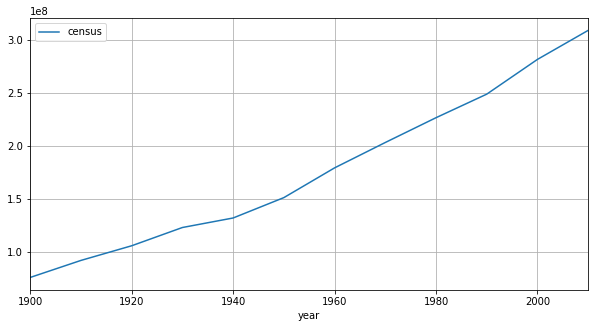

In [86]:
df1 = df1.drop(['Unnamed: 0'], axis=1)

# Zunächst schauen wir uns an wie die US-Bevölkerung über die Jahre gewachsen/gesunken ist:
df1.plot(x='year', y='census', figsize=(10,5), grid=True)

In [88]:
# Offensichtlich steigt die Bevölkerung in den USA stetig an. Aber nach welchem Muster? Um die Anzahl der Einwohner in den 
# Staaten in diesem Jahr vorherzusagen interpolieren wir mit einem Polynom 8ten Grades und berechnen anschließend den Wert
# für das Jahr 2050:
coefficients = np.polyfit(df1['year'], df1['census'], 8)
value_at_2050 = np.polyval(coefficients,2050)
value_at_2050

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


-3557626880.0

In [73]:
# Natürlich ist das quatsch... wie kann denn bitte die Bevölkerungszahl eines Landes negativ sein? Hier muss anders argumentiert
# werden. Wir haben mit einem Polynom interpoliert und wissen zudem, dass Polynome stetig sind. Daraus folgt,
# da der obige Wert negativ ist, dass irgendwann zwischen 2010 und 2050 die x-Achse geschnitten werden muss, was einer
# Bevölkerungszahl von 0 entspricht. Das bedeutet, dass noch vor 2050 alle Menschen in den USA tot sein werden.
# Wie das passieren soll? Keine Ahnung. Aber hey: Die Zahlen können gar nicht Lügen.

In [ ]:
#####

In [89]:
# 2. Störche bringen Babies in Brandenburg

# Wie immer verschaffen wir uns zunächst einen Überblick über den Dataframe.
df2 = pd.read_csv('storks_and_babies.csv')
df2

Unnamed: 0  year  number_breeding_storkpairs_brandenburg  \
0           1  1996                                    1354   
1           2  1997                                    1127   
2           3  1998                                    1316   
3           4  1999                                    1357   
4           5  2000                                    1405   
5           6  2001                                    1372   
6           7  2002                                    1369   
7           8  2003                                    1318   
8           9  2004                                    1409   
9          10  2005                                    1181   

   number_births_brandenburg  
0                      15140  
1                      16370  
2                      17146  
3                      17928  
4                      18444  
5                      17692  
6                      17704  
7                      17970  
8                      18148  
9                      17910

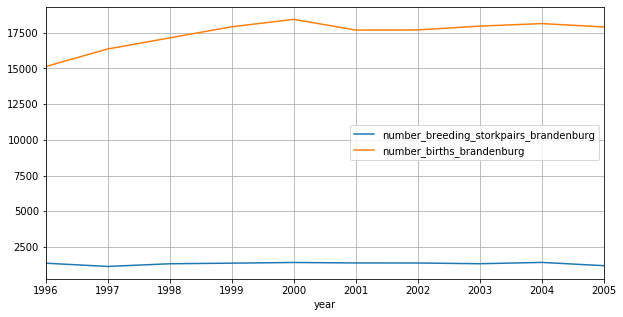

In [90]:
df2 = df2.drop(['Unnamed: 0'], axis=1)

# Zunächst schauen wir uns an wie sich die Anzahl der brütenden Storchenpaare und die Geburtenzahl in Brandenburg über
# die Jahre verändert hat:
df2.plot(x='year', y=['number_breeding_storkpairs_brandenburg', 'number_births_brandenburg'], figsize=(10,5), grid=True)

In [91]:
# Aha! Zunächst sollte man zwar meinen, dass hier kein Zusammenhang besteht, aber eine kleine Verschiebung des blauen Graphen
# offenbart sofort was sich abspielt:
df2['number_breeding_storkpairs_brandenburg'] = df2['number_breeding_storkpairs_brandenburg'].add(sum(np.array(df2['number_births_brandenburg'])-np.array(df2['number_breeding_storkpairs_brandenburg']))/10)
df2

year  number_breeding_storkpairs_brandenburg  number_births_brandenburg
0  1996                                 17478.4                      15140
1  1997                                 17251.4                      16370
2  1998                                 17440.4                      17146
3  1999                                 17481.4                      17928
4  2000                                 17529.4                      18444
5  2001                                 17496.4                      17692
6  2002                                 17493.4                      17704
7  2003                                 17442.4                      17970
8  2004                                 17533.4                      18148
9  2005                                 17305.4                      17910

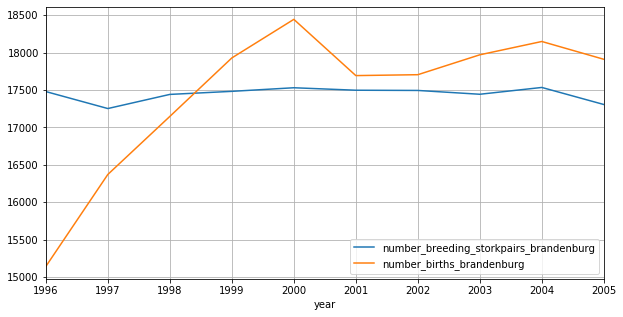

In [92]:
# Schauen wir uns nochmal den Plot an:
df2.plot(x='year', y=['number_breeding_storkpairs_brandenburg', 'number_births_brandenburg'], figsize=(10,5), grid=True)

In [93]:
# Nun ist eine eindeutige Korrelation ab dem Jahr 2001 zu erkennen. Die triviale Konklusion hieraus lautet:
# "Seit dem Jahr 2001 werden in Brandenburg die Babies vom Storch gebracht."
# Warum das so ist bleibt allerdings noch herauszufinden.

In [ ]:
# Jetzt seid ihr an der Reihe! Ihr habt die fehler entdeckt die hier gemacht wurden und konntet sie korrigieren
# Dann lasst es uns wissen wie ihr das gemacht habt
# und schriebt uns direkt an podcast@erium.de, auf LinkedIn, Facebook, Twitter oder Instagram!

# Danke fürs Anschauen dieser Jupyter Notebook Datei und Hören des Podcasts. Seid auch gespannt auf die nächste Folge von 
# The Erium Podcast in der wir euch alles Wissenswerte zu Reinforcement Learning erzählen! :D